In [13]:
import os
import pandas as pd

In [14]:
df_clean = pd.read_csv(os.path.join("detectors_data_raw", "cleaned_traffic.csv"), sep=",")

In [15]:
df_clean.head()
df_clean.drop(columns=["file_source", "date"], inplace=True)
df_clean.head()

,detector_id,hour,quality,veh_total,speed_total,veh_cars,speed_cars,veh_trucks,speed_trucks,timestamp,year
0,100101010000369,0,1.0,138,75.1,135,75.1,3,74.0,2015-01-01 00:00:00,2015
1,100101010000874,0,1.0,45,47.7,40,49.1,5,36.8,2015-01-01 00:00:00,2015
2,100101010000975,0,1.0,33,50.5,32,50.5,1,50.0,2015-01-01 00:00:00,2015
3,100101010001076,0,1.0,55,52.5,52,53.5,3,36.0,2015-01-01 00:00:00,2015
4,100101010001177,0,1.0,58,49.2,42,56.3,16,30.5,2015-01-01 00:00:00,2015


In [16]:
berlin_school_holidays = [
    # ----- 2015 -----
    ("2015-02-02", "2015-02-07"),  # Winter
    ("2015-03-30", "2015-04-11"),  # Easter
    ("2015-07-16", "2015-08-29"),  # Summer
    ("2015-10-19", "2015-10-31"),  # Autumn
    ("2015-12-23", "2016-01-02"),  # Christmas

    # ----- 2016 -----
    ("2016-02-01", "2016-02-06"),  # Winter
    ("2016-03-21", "2016-04-02"),  # Easter
    ("2016-07-21", "2016-09-02"),  # Summer
    ("2016-10-17", "2016-10-28"),  # Autumn
    ("2016-12-23", "2017-01-02"),  # Christmas

    # ----- 2017 -----
    ("2017-01-30", "2017-02-04"),  # Winter
    ("2017-04-10", "2017-04-18"),  # Easter (corrected end date)
    ("2017-07-20", "2017-09-01"),  # Summer
    ("2017-10-23", "2017-11-04"),  # Autumn
    ("2017-12-21", "2018-01-02"),  # Christmas

    # ----- 2018 -----
    ("2018-02-05", "2018-02-10"),  # Winter
    ("2018-03-26", "2018-04-07"),  # Easter
    ("2018-07-05", "2018-08-17"),  # Summer
    ("2018-10-22", "2018-11-03"),  # Autumn
    ("2018-12-22", "2019-01-05"),  # Christmas (corrected both start + end)

    # ----- 2019 -----
    ("2019-02-04", "2019-02-09"),  # Winter
    ("2019-04-15", "2019-04-27"),  # Easter
    ("2019-06-20", "2019-08-02"),  # Summer
    ("2019-10-04", "2019-10-19"),  # Autumn
    ("2019-12-23", "2020-01-03"),  # Christmas

    # ----- 2020 -----
    ("2020-02-03", "2020-02-08"),  # Winter
    ("2020-04-06", "2020-04-17"),  # Easter
    ("2020-06-25", "2020-08-07"),  # Summer
    ("2020-10-12", "2020-10-24"),  # Autumn
    ("2020-12-21", "2021-01-02"),  # Christmas

    # ----- 2021 -----
    ("2021-02-01", "2021-02-06"),  # Winter
    ("2021-03-29", "2021-04-10"),  # Easter
    ("2021-06-24", "2021-08-06"),  # Summer
    ("2021-10-11", "2021-10-23"),  # Autumn
    ("2021-12-23", "2022-01-01"),  # Christmas

    # ----- 2022 -----
    ("2022-01-29", "2022-02-05"),  # Winter
    ("2022-04-11", "2022-04-23"),  # Easter
    ("2022-07-07", "2022-08-19"),  # Summer
    ("2022-10-24", "2022-11-05"),  # Autumn
    ("2022-12-23", "2023-01-02"),  # Christmas

    # ----- 2023 -----
    ("2023-01-30", "2023-02-04"),  # Winter
    ("2023-04-03", "2023-04-14"),  # Easter
    ("2023-07-13", "2023-08-25"),  # Summer
    ("2023-10-23", "2023-11-04"),  # Autumn
    ("2023-12-22", "2024-01-02"),  # Christmas

    # ----- 2024 -----
    ("2024-02-05", "2024-02-10"),  # Winter
    ("2024-03-25", "2024-04-06"),  # Easter
    ("2024-07-18", "2024-08-30"),  # Summer
    ("2024-10-21", "2024-11-02"),  # Autumn
    ("2024-12-23", "2025-01-04")   # Christmas
]


In [12]:
%pip install holidays

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
# Pre-processing time features
import holidays
import numpy as np

df_clean["timestamp"] = pd.to_datetime(df_clean["timestamp"])

df_prep = df_clean.copy()

# Hour (only if not already present)
if "hour" not in df_prep.columns:
    df_prep["hour"] = df_prep["timestamp"].dt.hour

# Day of week (0=Mon, 6=Sun)
df_prep["day_of_week"] = df_prep["timestamp"].dt.dayofweek
print("Done : day_of_week")

# Weekend flag
df_prep["is_weekend"] = df_prep["day_of_week"].isin([5, 6]).astype(int)
print("Done : is_weekend")

# Month
df_prep["month"] = df_prep["timestamp"].dt.month
print("Done : month")

# Season (meteorological)
def season_from_month(m):
    if m in [12,1,2]: return "winter"
    if m in [3,4,5]: return "spring"
    if m in [6,7,8]: return "summer"
    if m in [9,10,11]: return "autumn"
df_prep["season"] = df_prep["month"].apply(season_from_month)
print("Done : season")

# Holiday indicator (Germany, Berlin)
de_holidays = holidays.Germany(prov="BE")
df_prep["is_holiday"] = df_prep["timestamp"].dt.date.astype("datetime64[ns]").isin(de_holidays).astype(int)

# Rush hour (simple version)
df_prep["is_rush_hour"] = df_prep["hour"].isin([7,8,9,16,17,18]).astype(int)
print("Done : is_rush_hour")

df_prep["date_only"] = df_prep["timestamp"].dt.date.astype("datetime64[ns]")
print("Done : date_only")

# Build an empty array
df_prep["is_school_holiday"] = 0

# For each holiday interval: set mask to 1 (vectorized)
for start, end in berlin_school_holidays:
    start = np.datetime64(start)
    end   = np.datetime64(end)
    mask = (df_prep["date_only"] >= start) & (df_prep["date_only"] <= end)
    df_prep.loc[mask, "is_school_holiday"] = 1

# Remove temporary column
df_prep = df_prep.drop(columns=["date_only"])

print("Done : is_school_holiday")

Done : day_of_week
Done : is_weekend
Done : month
Done : season
Done : is_rush_hour
Done : date_only
Done : is_school_holiday


In [ ]:
# Free-Flow Speed Estimation and Congestion Index

freeflow = df_prep.groupby("detector_id")["speed_total"].max()
df_prep["free_flow_speed"] = df_prep["detector_id"].map(freeflow)

df_prep.head()


detector_id
100101010000167    72.4
100101010000369    75.1
100101010000874    52.6
100101010000975    54.4
100101010001076    55.0
Name: speed_total, dtype: float64


In [ ]:
# Compute speed ratio / congestion index
df_prep["speed_ratio"] = df_prep["speed_total"] / df_prep["free_flow_speed"]
df_prep["congestion_index"] = 1 - df_prep["speed_ratio"]

df_prep.head()

,detector_id,hour,quality,veh_total,speed_total,veh_cars,speed_cars,veh_trucks,speed_trucks,timestamp,...,day_of_week,is_weekend,month,season,is_holiday,is_rush_hour,is_school_holiday,free_flow_speed,speed_ratio,congestion_index
0,100101010000369,0,1.0,138,75.1,135,75.1,3,74.0,2015-01-01,...,3,0,1,winter,0,0,0,75.1,1.000000,0.000000
1,100101010000874,0,1.0,45,47.7,40,49.1,5,36.8,2015-01-01,...,3,0,1,winter,0,0,0,52.6,0.906844,0.093156
2,100101010000975,0,1.0,33,50.5,32,50.5,1,50.0,2015-01-01,...,3,0,1,winter,0,0,0,54.4,0.928309,0.071691
3,100101010001076,0,1.0,55,52.5,52,53.5,3,36.0,2015-01-01,...,3,0,1,winter,0,0,0,55.0,0.954545,0.045455
4,100101010001177,0,1.0,58,49.2,42,56.3,16,30.5,2015-01-01,...,3,0,1,winter,0,0,0,58.0,0.848276,0.151724


In [22]:
%pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Spatial Enrichment from metadata

metadata_path = os.path.join("detectors_data_raw", "Metadata_detectors_2022_07_20.xlsx")
df_meta = pd.read_excel(metadata_path)

# Rename columns to English + clean formats
df_meta = df_meta.rename(columns={
    "DET_ID15": "detector_id",
    "LÄNGE (WGS84)": "lon",
    "BREITE (WGS84)": "lat",
    "STRASSE": "road_name",
    "POSITION": "road_position",
    "POS_DETAIL": "road_position_detail",
    "RICHTUNG": "direction",
    "SPUR": "lane",
    "annotation": "lane_desc",
    "INBETRIEBNAHME": "installed_on",
    "ABBAUDATUM": "removed_on",
    "DEINSTALLIERT": "removed_flag"
})

cols_to_drop = [
    "MQ_KURZNAME",
    "DET_NAME_ALT",
    "DET_NAME_NEU",
    "MQ_ID15",
    "installed_on",
    "removed_on",
    "removed_flag",
    "KOMMENTAR",
    "lane_desc",
    "road_position_detail"   # optional: drop if too messy
]
df_meta.drop(columns=cols_to_drop, inplace=True)

print(df_meta.head())

       detector_id  road_name  \
0  100101010000167       A115   
1  100101010000268       A115   
2  100101010000369       A115   
3  100101010000470       A115   
4  100101010000874  Clayallee   

                                       road_position direction    lane  \
0                        AS Spanische Allee – Brücke   Südwest    HF_R   
1                        AS Spanische Allee – Brücke   Südwest  HF_2vR   
2                        AS Spanische Allee – Brücke   Nordost    HF_R   
3                        AS Spanische Allee – Brücke   Nordost  HF_2vR   
4  zwischen Scharfestraße und Propst-Süssmilch-We...       Süd    HF_R   

                           lane_desc        lon        lat  
0          Hauptfahrbahn rechte Spur  13.192578  52.433868  
1  Hauptfahrbahn, 2. Spur von rechts  13.192578  52.433868  
2          Hauptfahrbahn rechte Spur  13.192747  52.433813  
3  Hauptfahrbahn, 2. Spur von rechts  13.192747  52.433813  
4          Hauptfahrbahn rechte Spur  13.261301  52

In [21]:
set_data = set(df_prep["detector_id"].unique())
set_meta = set(df_meta["detector_id"].unique())

print("In data but not in metadata:", set_data - set_meta)
print("In metadata but not in data:", set_meta - set_data)


In data but not in metadata: {100101010100096, 100101010098177, 100101010094339, 100101010100100, 100101010099591, 100101010095753, 100101010099086, 100101010026641, 100101010098581, 100101010094743, 100101010098076, 100101010096157, 100101010094238, 100101010099490, 100101010095652, 100101010098985, 100101010098480, 100101010026035, 100101010083124, 100101010096056, 100101010099389, 100101010095551, 100101010098884, 100101010098379, 100101010094541, 100101010100302, 100101010083023, 100101010025934, 100101010095955, 100101010099288, 100101010095450, 100101010098783, 100101010094945, 100101010098278, 100101010094440, 100101010100201, 100101010095854, 100101010099187, 100101010098682, 100101010094844}
In metadata but not in data: {100101010052610, 100101010090501, 100101010014214, 100101010044425, 100101010074636, 100101010013204, 100101010020375, 100101010035735, 100101010058266, 100101010005019, 100101010035230, 100101010080801, 100101010004514, 100101010019365, 100101010004009, 10010

In [22]:
# Convert detector ID to integer (match df_clean)
df_meta["detector_id"] = df_meta["detector_id"].astype("int64")

# Keep only metadata entries that correspond to detectors still in df_prep
valid_detectors_in_data = set_data.intersection(set_meta)

before_meta = len(df_meta)
df_meta = df_meta[df_meta["detector_id"].isin(valid_detectors_in_data)]
after_meta = len(df_meta)
print(f"Metadata entries before filtering: {before_meta}")
print(f"Metadata entries after filtering: {after_meta}")

df_prep = df_prep[df_prep["detector_id"].isin(valid_detectors_in_data)]
print(f"Data entries after filtering: {len(df_prep)}")

# Merge with your working dataset
df_prep = df_prep.merge(df_meta, on="detector_id", how="left")
df_prep.head()

Metadata entries before filtering: 582
Metadata entries after filtering: 392
Data entries after filtering: 22707127


,detector_id,hour,quality,veh_total,speed_total,veh_cars,speed_cars,veh_trucks,speed_trucks,timestamp,...,free_flow_speed,speed_ratio,congestion_index,road_name,road_position,direction,lane,lane_desc,lon,lat
0,100101010000369,0,1.0,138,75.1,135,75.1,3,74.0,2015-01-01,...,75.1,1.000000,0.000000,A115,AS Spanische Allee – Brücke,Nordost,HF_R,Hauptfahrbahn rechte Spur,13.192747,52.433813
1,100101010000874,0,1.0,45,47.7,40,49.1,5,36.8,2015-01-01,...,52.6,0.906844,0.093156,Clayallee,zwischen Scharfestraße und Propst-Süssmilch-We...,Süd,HF_R,Hauptfahrbahn rechte Spur,13.261301,52.436642
2,100101010000975,0,1.0,33,50.5,32,50.5,1,50.0,2015-01-01,...,54.4,0.928309,0.071691,Clayallee,zwischen Scharfestraße und Propst-Süssmilch-We...,Süd,HF_2vR,"Hauptfahrbahn, 2. Spur von rechts",13.261301,52.436642
3,100101010001076,0,1.0,55,52.5,52,53.5,3,36.0,2015-01-01,...,55.0,0.954545,0.045455,Berliner Straße,"zwischen Seehofstraße und Gartenstraße, in Höh...",West,HF_R,Hauptfahrbahn rechte Spur,13.263106,52.435112
4,100101010001177,0,1.0,58,49.2,42,56.3,16,30.5,2015-01-01,...,58.0,0.848276,0.151724,Berliner Straße,"zwischen Seehofstraße und Gartenstraße, in Höh...",West,HF_2vR,"Hauptfahrbahn, 2. Spur von rechts",13.263106,52.435112


In [24]:
df_prep.drop(columns=["lane_desc"], inplace=True)

In [25]:
def print_nan_rows(df, cols=None, n=10):
    """
    Print summary and sample rows that contain NaNs.
    - cols: list of columns to check (None = check all columns)
    - n: number of sample rows to display
    """
    if cols is None:
        mask = df.isna().any(axis=1)
    else:
        mask = df[cols].isna().any(axis=1)

    total = len(df)
    cnt = int(mask.sum())
    print(f"Rows with NaN (checked cols={cols}): {cnt} / {total} ({cnt/total:.2%})")
    if cnt == 0:
        return

    # show top n problematic rows
    try:
        from IPython.display import display
        display(df.loc[mask].head(n))
    except Exception:
        print(df.loc[mask].head(n).to_string())

    # per-column NaN counts (overall and restricted to problematic rows)
    print("\nPer-column NaN counts (overall, top 20):")
    print(df.isna().sum().sort_values(ascending=False).head(20))
    print("\nPer-column NaN counts (only rows with any NaN):")
    print(df.loc[mask].isna().sum().sort_values(ascending=False))

# Usage examples
print_nan_rows(df_prep, n=5)
print_nan_rows(df_meta, n=5)

Rows with NaN (checked cols=None): 0 / 23385313 (0.00%)
Rows with NaN (checked cols=None): 4 / 392 (1.02%)


,detector_id,road_name,road_position,direction,lane,lane_desc,lon,lat
117,100101010019466,Blankenburger Straße,"zwischen Grabenwinkel und Straße 30, in Höhe ...",Süd,HF_R,NaN,13.443023,52.571017
118,100101010019567,Blankenburger Straße,"zwischen Straße 30 und Grabenwinkel, in Höhe H...",Nord,HF_R,NaN,13.443013,52.570932
303,100101010054731,Baumschulenstraße,"zwischen Sonnenallee und Königsheideweg, LM 2...",Südwest,HF_R,NaN,13.478634,52.458654
304,100101010054832,Baumschulenstraße,"zwischen Königsheideweg und Sonnenallee, LM 29...",Nordost,HF_R,NaN,13.478579,52.458542



Per-column NaN counts (overall, top 20):
lane_desc        4
detector_id      0
road_name        0
road_position    0
direction        0
lane             0
lon              0
lat              0
dtype: int64

Per-column NaN counts (only rows with any NaN):
lane_desc        4
detector_id      0
road_name        0
road_position    0
direction        0
lane             0
lon              0
lat              0
dtype: int64


detector_id          0
season               0
lon                  0
lane                 0
direction            0
road_position        0
road_name            0
congestion_index     0
speed_ratio          0
free_flow_speed      0
is_school_holiday    0
is_rush_hour         0
is_holiday           0
month                0
hour                 0
is_weekend           0
day_of_week          0
year                 0
timestamp            0
speed_trucks         0
veh_trucks           0
speed_cars           0
veh_cars             0
speed_total          0
veh_total            0
quality              0
lat                  0
dtype: int64


C:\Users\adib4\AppData\Local\Temp\ipykernel_8288\2634986017.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .apply(lambda ts: pd.date_range(ts.min(), ts.max(), freq="H").difference(ts).size)


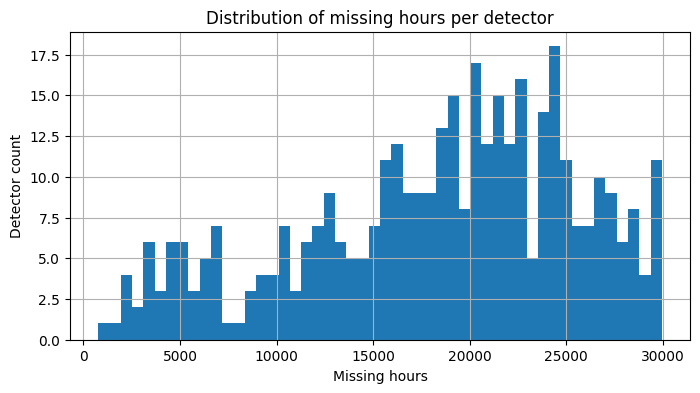

detector_id          0.0
season               0.0
lon                  0.0
lane                 0.0
direction            0.0
road_position        0.0
road_name            0.0
congestion_index     0.0
speed_ratio          0.0
free_flow_speed      0.0
is_school_holiday    0.0
is_rush_hour         0.0
is_holiday           0.0
month                0.0
hour                 0.0
is_weekend           0.0
day_of_week          0.0
year                 0.0
timestamp            0.0
speed_trucks         0.0
veh_trucks           0.0
speed_cars           0.0
veh_cars             0.0
speed_total          0.0
veh_total            0.0
quality              0.0
lat                  0.0
dtype: float64


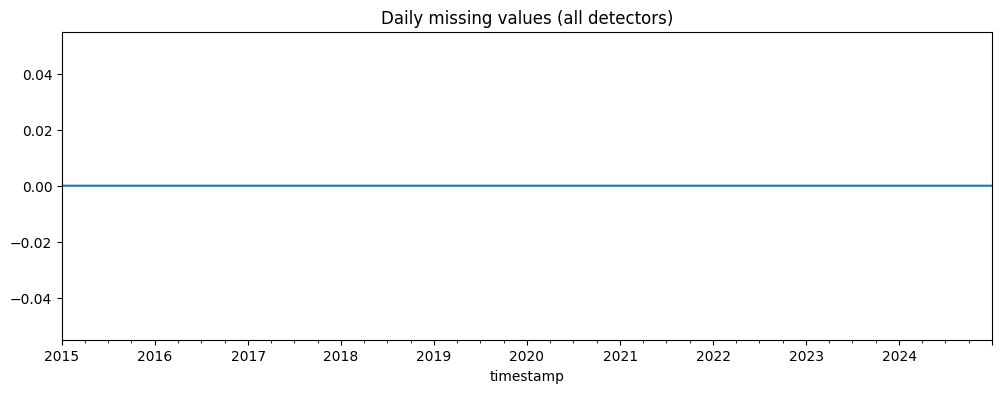

In [26]:
# Overall missing values
print(df_prep.isna().sum().sort_values(ascending=False))

missing_hours_per_detector = (
    df_prep
    .groupby("detector_id")["timestamp"]
    .apply(lambda ts: pd.date_range(ts.min(), ts.max(), freq="H").difference(ts).size)
    .sort_values(ascending=False)
)

missing_hours_per_detector.head(20)

missing_hours_per_detector.hist(bins=50, figsize=(8,4))

import matplotlib.pyplot as plt
plt.title("Distribution of missing hours per detector")
plt.xlabel("Missing hours")
plt.ylabel("Detector count")
plt.show()

rows = len(df_prep)
missing_pct = (df_prep.isna().sum() / rows * 100).sort_values(ascending=False)
print(missing_pct)

missing_by_time = df_prep.set_index("timestamp").isna().sum(axis=1).resample("D").sum()
missing_by_time.plot(figsize=(12,4))
plt.title("Daily missing values (all detectors)")
plt.show()



In [ ]:
df_interp = df_prep.copy()

# List of numeric columns to interpolate
num_cols = [
    "speed_total", "veh_total",
    "speed_cars", "veh_cars",
    "speed_trucks", "veh_trucks",
    "free_flow_speed", "speed_ratio", "congestion_index"
]

# Function to interpolate short gaps only
def interpolate_detector(g, max_gap_hours=6):
    # Ensure sorted
    g = g.sort_values("timestamp")
    g = g.set_index("timestamp")

    # Identify gaps
    is_missing = g[num_cols].isna().any(axis=1)
    gap_lengths = is_missing.groupby((is_missing != is_missing.shift()).cumsum()).transform("size")
    
    # Interpolate only gaps <= max_gap_hours
    mask_small_gaps = is_missing & (gap_lengths <= max_gap_hours)
    
    # Interpolate those small gaps
    g[num_cols] = g[num_cols].interpolate(method="time", limit=max_gap_hours)
    
    # Leave long gaps untouched
    return g.reset_index()

# Apply per detector
df_interp = (
    df_interp
    .groupby("detector_id", group_keys=False)
    .apply(interpolate_detector)
)

print("Interpolation complete.")


In [28]:
# Prepare weather data

df_weather = pd.read_csv("berlin_weather_2015_2025.csv")
df_weather.drop(columns=["wind_speed", "wind_direction"], inplace=True)
df_weather.describe()

,temperature,dew_point,precipitation,relative_humidity,visibility,cloud_cover
count,87650.000000,87652.000000,87648.000000,87650.000000,87599.000000,87158.000000
mean,10.861020,6.229796,0.062195,76.414809,31506.132490,65.154880
std,7.958873,6.234813,0.454457,19.553338,15472.240323,34.035499
min,-12.400000,-16.300000,0.000000,19.000000,0.000000,0.000000
25%,4.800000,1.600000,0.000000,62.000000,20000.000000,37.000000
50%,10.300000,6.400000,0.000000,81.000000,35000.000000,87.000000
75%,16.700000,11.000000,0.000000,94.000000,45000.000000,87.000000
max,37.500000,22.400000,39.700000,100.000000,70000.000000,100.000000


In [ ]:
# Convert timestamp to datetime (BrightSky usually gives UTC; if naive, keep as-is)
df_weather["timestamp"] = pd.to_datetime(df_weather["timestamp"])

df_weather["is_rain"] = (df_weather["precipitation"] > 0).astype(int)
df_weather["is_snow"] = df_weather["condition"].str.contains("snow", case=False, na=False).astype(int)
df_weather["is_fog"]  = (df_weather["visibility"] < 1000).astype(int)
df_weather["is_dark"] = (df_weather["cloud_cover"] > 6).astype(int)

df_weather = df_weather.sort_values("timestamp").reset_index(drop=True)

print("Weather preprocessing done.")
df_weather.head()

Weather preprocessing done.


,timestamp,temperature,dew_point,precipitation,relative_humidity,visibility,cloud_cover,condition,icon,is_rain,is_snow,is_fog,is_dark
0,2015-01-01 00:00:00+00:00,4.9,4.8,0.0,99.0,4000.0,100.0,dry,cloudy,0,0,0,1
1,2015-01-01 01:00:00+00:00,4.8,4.7,0.0,99.0,6000.0,87.0,dry,cloudy,0,0,0,1
2,2015-01-01 02:00:00+00:00,4.7,4.4,0.0,98.0,6000.0,87.0,dry,cloudy,0,0,0,1
3,2015-01-01 03:00:00+00:00,4.4,3.9,0.0,97.0,7000.0,87.0,dry,cloudy,0,0,0,1
4,2015-01-01 04:00:00+00:00,3.9,3.2,0.0,95.0,9000.0,87.0,dry,cloudy,0,0,0,1


In [32]:
# Merge weather data into main dataset

df_weather["timestamp"] = pd.to_datetime(df_weather["timestamp"], utc=True).dt.tz_convert(None)
df_prep_full = df_prep.merge(df_weather, on="timestamp", how="left")
df_prep_full.head()

,detector_id,hour,quality,veh_total,speed_total,veh_cars,speed_cars,veh_trucks,speed_trucks,timestamp,...,precipitation,relative_humidity,visibility,cloud_cover,condition,icon,is_rain,is_snow,is_fog,is_dark
0,100101010000369,0,1.0,138,75.1,135,75.1,3,74.0,2015-01-01,...,0.0,99.0,4000.0,100.0,dry,cloudy,0.0,0.0,0.0,1.0
1,100101010000874,0,1.0,45,47.7,40,49.1,5,36.8,2015-01-01,...,0.0,99.0,4000.0,100.0,dry,cloudy,0.0,0.0,0.0,1.0
2,100101010000975,0,1.0,33,50.5,32,50.5,1,50.0,2015-01-01,...,0.0,99.0,4000.0,100.0,dry,cloudy,0.0,0.0,0.0,1.0
3,100101010001076,0,1.0,55,52.5,52,53.5,3,36.0,2015-01-01,...,0.0,99.0,4000.0,100.0,dry,cloudy,0.0,0.0,0.0,1.0
4,100101010001177,0,1.0,58,49.2,42,56.3,16,30.5,2015-01-01,...,0.0,99.0,4000.0,100.0,dry,cloudy,0.0,0.0,0.0,1.0


In [33]:
df_prep_full.to_csv("preprocessed_full_data.csv", index=False)

In [2]:
import numpy as np
import pandas as pd

def downcast_df(df):
    """
    Downcast all numeric columns of a dataframe to 32-bit types
    (float32 / int32) to reduce memory usage.
    Timestamps are kept unchanged.
    Categories are preserved.
    """
    df_opt = df.copy()

    for col in df_opt.columns:
        col_type = df_opt[col].dtype

        # Skip datetimes
        if np.issubdtype(col_type, np.datetime64):
            continue
        
        # Float → float32
        if np.issubdtype(col_type, np.floating):
            df_opt[col] = pd.to_numeric(df_opt[col], downcast="float")

        # Int → int32
        elif np.issubdtype(col_type, np.integer):
            df_opt[col] = pd.to_numeric(df_opt[col], downcast="integer")

        # Object → try category
        elif col_type == object:
            # If many repeats, convert to category
            unique_ratio = df_opt[col].nunique() / len(df_opt[col])
            if unique_ratio < 0.5:  # heuristic threshold
                df_opt[col] = df_opt[col].astype("category")

    return df_opt

df = pd.read_csv("C:\\Users\\adib4\\OneDrive\\Documents\\Projets perso\\CongestionAI\\prepared_data\\preprocessed_full_data.csv")
df_optimized = downcast_df(df)
print(df_optimized.info())
df_optimized.to_csv("C:\\Users\\adib4\\OneDrive\\Documents\\Projets perso\\CongestionAI\\prepared_data\\preprocessed_full_data.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23385313 entries, 0 to 23385312
Data columns (total 38 columns):
 #   Column             Dtype   
---  ------             -----   
 0   timestamp          category
 1   detector_id        int64   
 2   hour               int8    
 3   quality            float32 
 4   veh_total          int16   
 5   speed_total        float32 
 6   veh_cars           int16   
 7   speed_cars         float32 
 8   veh_trucks         int16   
 9   speed_trucks       float32 
 10  year               int16   
 11  day_of_week        int8    
 12  is_weekend         int8    
 13  month              int8    
 14  season             category
 15  is_holiday         int8    
 16  is_rush_hour       int8    
 17  is_school_holiday  int8    
 18  free_flow_speed    float32 
 19  speed_ratio        float32 
 20  congestion_index   float32 
 21  road_name          category
 22  road_position      category
 23  direction          category
 24  lane               cat